In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def make_data(N):
    n=N
    global apple_lenght,apple_width,banana_lenght,banana_width,watermelon_lenght,watermelon_width
    apple_width=np.random.normal(6,1,n)
    apple_lenght=np.random.normal(6,1,n)
    banana_width=np.random.normal(4,1,n)
    banana_lenght=np.random.normal(8,1,n)
    watermelon_width=np.random.normal(25,3,n)
    watermelon_lenght=np.random.normal(25,3,n)

    data_x=np.concatenate([apple_width,banana_width,watermelon_width])
    data_y=np.concatenate([apple_lenght,banana_lenght,watermelon_lenght])
    data=np.array([data_x,data_y])
    data=data.T
    print(data.shape)
    return data




(300, 2)


Text(0, 0.5, 'Lenght')

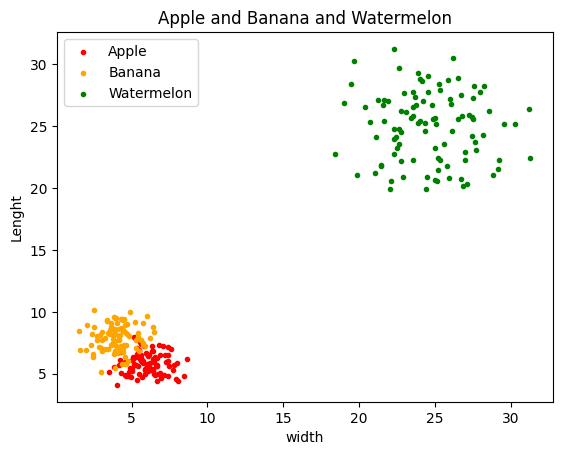

In [33]:
data=make_data(100)
plt.scatter(apple_width,apple_lenght,c='red',marker='.')
plt.scatter(banana_width,banana_lenght,c='orange',marker='.')
plt.scatter(watermelon_width,watermelon_lenght,c='green',marker='.')

plt.legend(["Apple","Banana","Watermelon"])

plt.title("Apple and Banana and Watermelon")
plt.xlabel("width")
plt.ylabel("Lenght")

# KNN: K Nearest Neighbours 

In [34]:
class Knn_3_class:
    def __init__(self,k,test,data):
        self.k=k
        self.test=test
        self.data=data
        self.distances=[]
        for x in self.data:
            d=self.euclidean_distance(self.test,x)
            self.distances.append(d)
        self.first_class()
        self.result1

    def euclidean_distance(self,x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))
    
    def make_label(self,n):
        Y_apples = np.zeros(n,dtype=int)
        Y_banana = np.ones(n,dtype=int)
        Y_watermelon = np.ones(n,dtype=int)*2

        Y_train= np.concatenate((Y_apples,Y_banana,Y_watermelon))
        return Y_train

    def first_class(self):
        nearest_neighbors=np.argsort(self.distances)[0:self.k]
        Y_train=self.make_label(100)
        a=Y_train[nearest_neighbors]
        result=np.bincount(a) 
        print(result)
        if result[0]>self.k//2:
            self.result1="Apple"
        elif result[1]>self.k//2:
            self.result1="Banana"
        elif result[2]>self.k//2:
            self.result1="Watermelon"
        elif result[0]==result[1]:
            self.apple_banana()
        elif result[1]==result[2]:
            self.banana_watermelon()
        elif result[0]==result[2]:
            self.apple_watermelon()

    def apple_banana(self):
        nearest_neighbors=np.argsort(self.distances[0:200])[0:self.k]
        Y_train=self.make_label(100)
        a=Y_train[nearest_neighbors]
        result=np.bincount(a)
        if np.argmax(result)==0:
            self.result1="Apple"
        else:
            self.result1="Banana"

    def banana_watermelon(self):
        banana_watermelon=self.distances[100:300]
        nearest_neighbors=np.argsort(banana_watermelon)[0:self.k]
        Y_train=self.make_label(100)
        a=Y_train[nearest_neighbors]
        result=np.bincount(a)
        if np.argmax(result)==0:
            return "Banana"
        else:
           return "Watermelon"

    def apple_watermelon(self):
        apple_watermelon=np.concatenate((self.distances[0:100],self.distances[200:300]))
        nearest_neighbors=np.argsort(apple_watermelon)[0:self.k]
        Y_train=self.make_label(100)
        a=Y_train[nearest_neighbors]
        result=np.bincount(a)
        if np.argmax(result)==0:
            return "Apple"
        else:
            return "Watermelon"
            
        



In [35]:
new_apple=np.array([4,6])
new_banana=np.array([6,10])
new_watermelon=np.array([20,20])
test_data=[new_apple,new_banana,new_watermelon]
print(new_apple)

[4 6]


In [36]:
res=[]
for i in test_data:
    a=Knn_3_class(5,i,data)
    print(a.result1)
    res.append(a.result1)
    

    


[4 1]
Apple
[0 5]
Banana
[0 0 5]
Watermelon


Text(0, 0.5, 'Lenght')

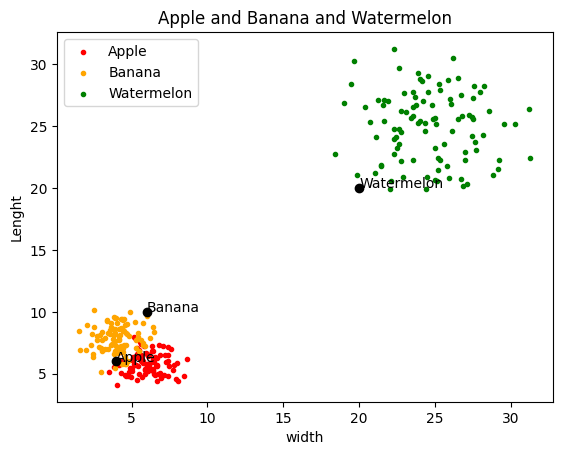

In [38]:
plt.scatter(apple_width,apple_lenght,c='red',marker='.')
plt.scatter(banana_width,banana_lenght,c='orange',marker='.')
plt.scatter(watermelon_width,watermelon_lenght,c='green',marker='.')
for i,j in enumerate(test_data):
    plt.scatter(test_data[i][0], test_data[i][1],c='black',marker='o')
    plt.annotate(res[i], (test_data[i][0], test_data[i][1]))


plt.legend(["Apple","Banana","Watermelon"])

plt.title("Apple and Banana and Watermelon")
plt.xlabel("width")
plt.ylabel("Lenght")